In [2307]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import drive

drive.mount('/content/drive')
path = "/content/drive/My Drive/ML learning/pumpitup/data"
train = pd.read_csv(
    path+"/TrainingValues.csv",
    index_col="id"
)
lables = pd.read_csv(
    path+"/TrainingLables.csv",
    index_col="id"
)
test = pd.read_csv(
    path+"/TestValues.csv",
    index_col="id"
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2308]:
train.shape

(59400, 39)

In [2309]:
lables.shape

(59400, 1)

In [2310]:
test.shape

(14850, 39)

In [2311]:
train.isnull().sum()

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [2312]:
lables.isnull().sum()

status_group    0
dtype: int64

In [2313]:
test.isnull().sum()

amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
quantity_g

In [2314]:
train['extraction_type'].unique()

array(['gravity', 'submersible', 'swn 80', 'nira/tanira', 'india mark ii',
       'other', 'ksb', 'mono', 'windmill', 'afridev', 'other - rope pump',
       'india mark iii', 'other - swn 81', 'other - play pump', 'cemo',
       'climax', 'walimi', 'other - mkulima/shinyanga'], dtype=object)

In [2315]:
train['extraction_type_group'].unique()

array(['gravity', 'submersible', 'swn 80', 'nira/tanira', 'india mark ii',
       'other', 'mono', 'wind-powered', 'afridev', 'rope pump',
       'india mark iii', 'other handpump', 'other motorpump'],
      dtype=object)

In [2316]:
train['extraction_type_class'].unique()

array(['gravity', 'submersible', 'handpump', 'other', 'motorpump',
       'wind-powered', 'rope pump'], dtype=object)

Text(0.5, 1.0, 'Count of water points by extraction_type_class')

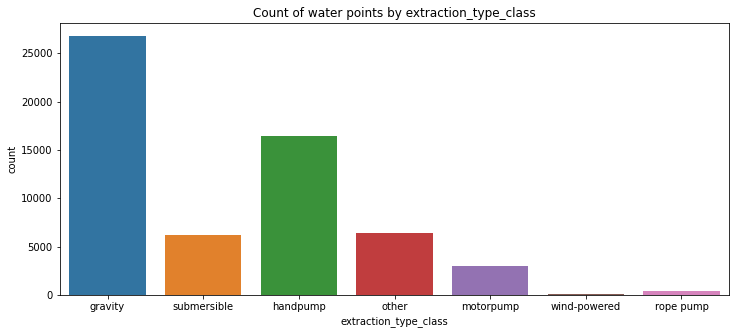

In [2317]:
plt.figure(figsize=(12,5))
sns.countplot(x='extraction_type_class',data=train)
plt.title("Count of water points by extraction_type_class")

Text(0.5, 1.0, 'Count of water points by extraction_type_group')

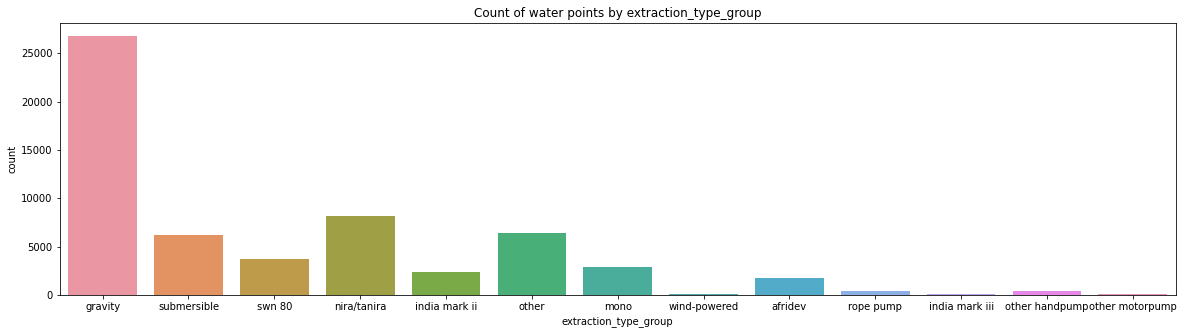

In [2318]:
plt.figure(figsize=(20,5))
sns.countplot(x='extraction_type_group',data=train)
plt.title("Count of water points by extraction_type_group")

In [2319]:
train["extraction_type_group"].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

Text(0.5, 1.0, 'Count of water points by extraction_type')

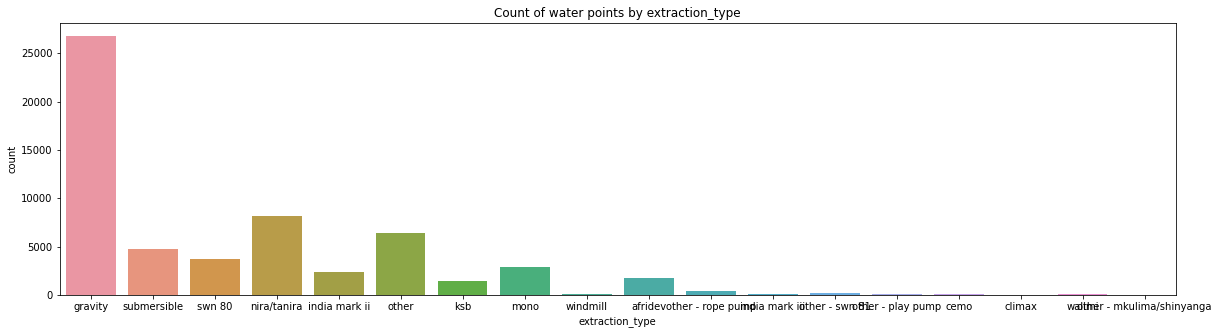

In [2320]:
plt.figure(figsize=(20,5))
sns.countplot(x='extraction_type',data=train)
plt.title("Count of water points by extraction_type")

In [2321]:
train["extraction_type"].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

Text(0.5, 1.0, 'Count of water points by water_quality')

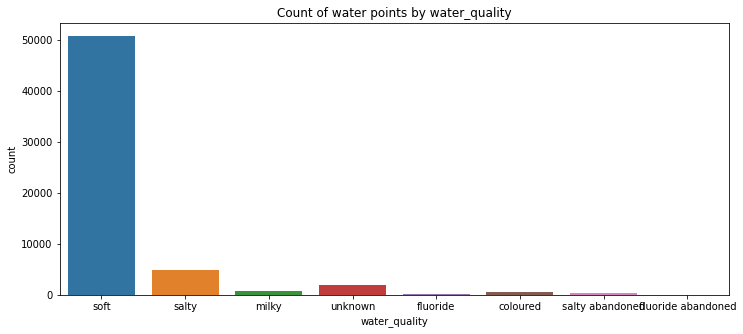

In [2322]:
plt.figure(figsize=(12,5))
sns.countplot(x='water_quality',data=train)
plt.title("Count of water points by water_quality")

Text(0.5, 1.0, 'Count of water points by quality_group')

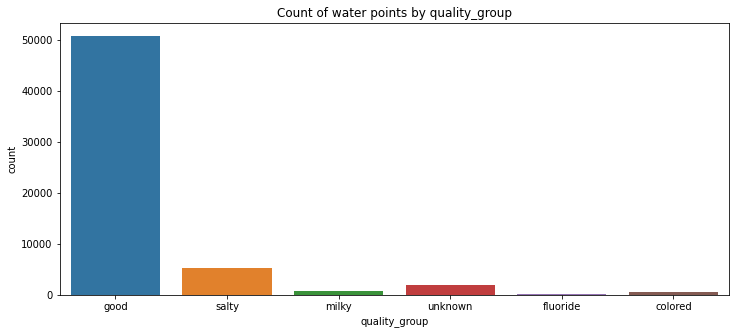

In [2323]:
plt.figure(figsize=(12,5))
sns.countplot(x='quality_group',data=train)
plt.title("Count of water points by quality_group")

Text(0.5, 1.0, 'Count of water points by payment')

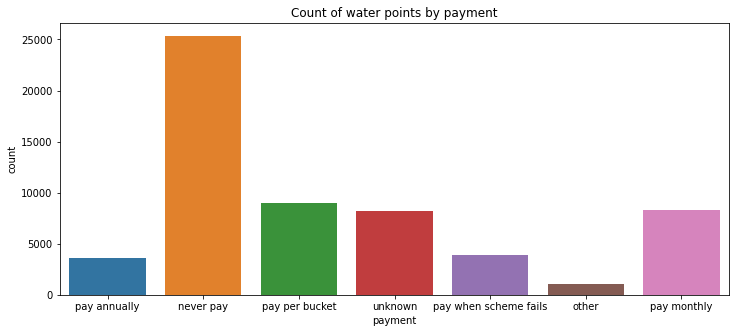

In [2324]:
plt.figure(figsize=(12,5))
sns.countplot(x='payment',data=train)
plt.title("Count of water points by payment")

Text(0.5, 1.0, 'Count of water points by payment_type')

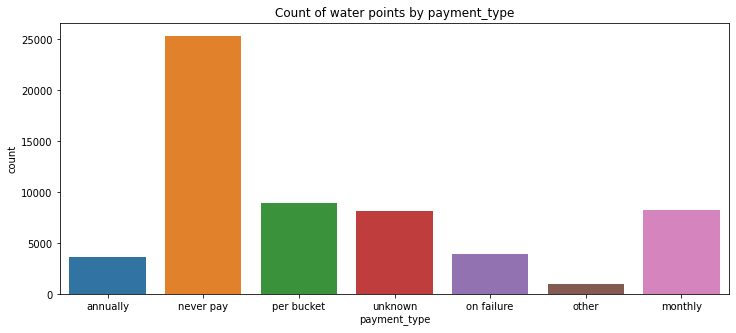

In [2325]:
plt.figure(figsize=(12,5))
sns.countplot(x='payment_type',data=train)
plt.title("Count of water points by payment_type")

Text(0.5, 1.0, 'Count of water points by quantity')

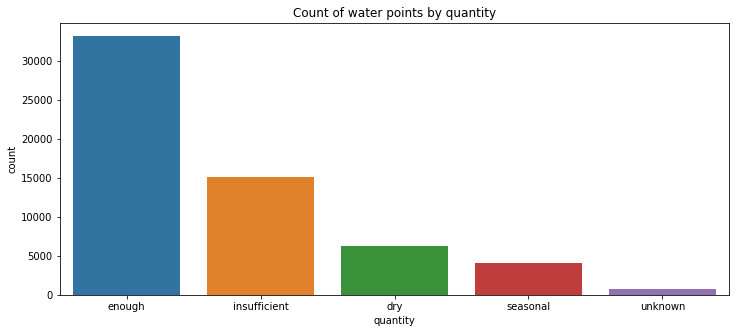

In [2326]:
plt.figure(figsize=(12,5))
sns.countplot(x='quantity',data=train)
plt.title("Count of water points by quantity")

Text(0.5, 1.0, 'Count of water points by quantity_group')

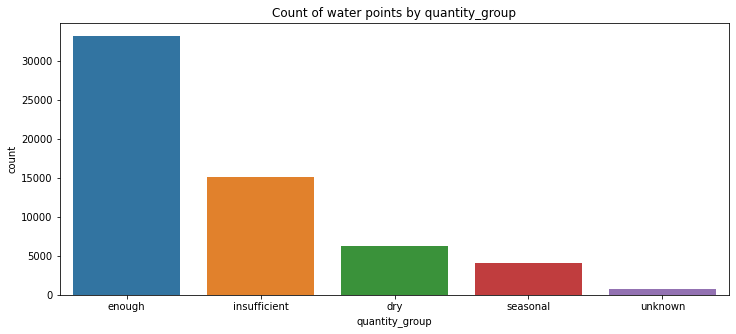

In [2327]:
plt.figure(figsize=(12,5))
sns.countplot(x='quantity_group',data=train)
plt.title("Count of water points by quantity_group")

Text(0.5, 1.0, 'Count of water points by source')

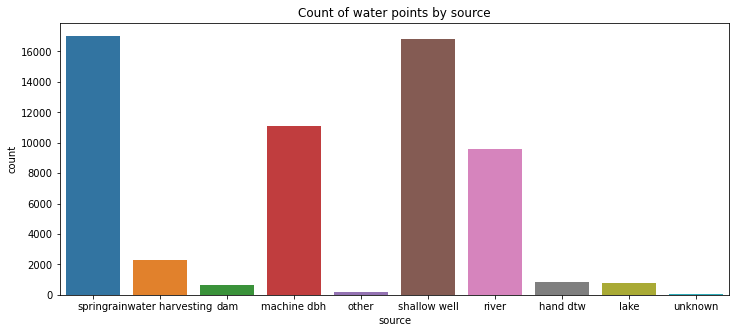

In [2328]:
plt.figure(figsize=(12,5))
sns.countplot(x='source',data=train)
plt.title("Count of water points by source")

Text(0.5, 1.0, 'Count of water points by source_type')

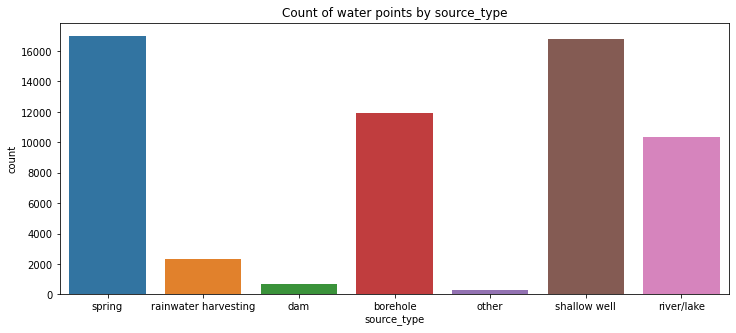

In [2329]:
plt.figure(figsize=(12,5))
sns.countplot(x='source_type',data=train)
plt.title("Count of water points by source_type")

Text(0.5, 1.0, 'Count of water points by source_class')

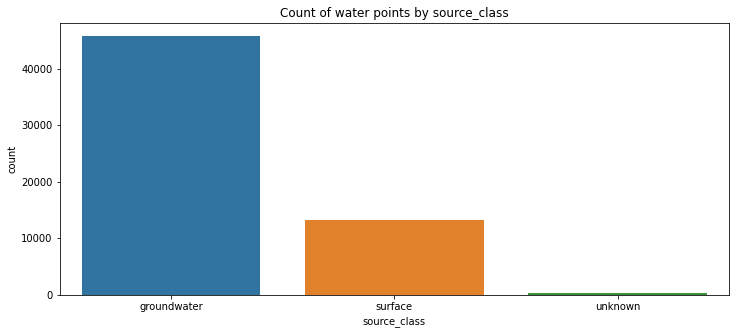

In [2330]:
plt.figure(figsize=(12,5))
sns.countplot(x='source_class',data=train)
plt.title("Count of water points by source_class")

Text(0.5, 1.0, 'Count of water points by waterpoint_type')

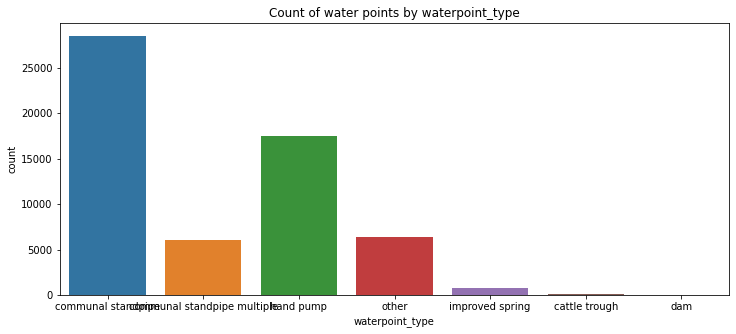

In [2331]:
plt.figure(figsize=(12,5))
sns.countplot(x='waterpoint_type',data=train)
plt.title("Count of water points by waterpoint_type")

Text(0.5, 1.0, 'Count of water points by waterpoint_type_group')

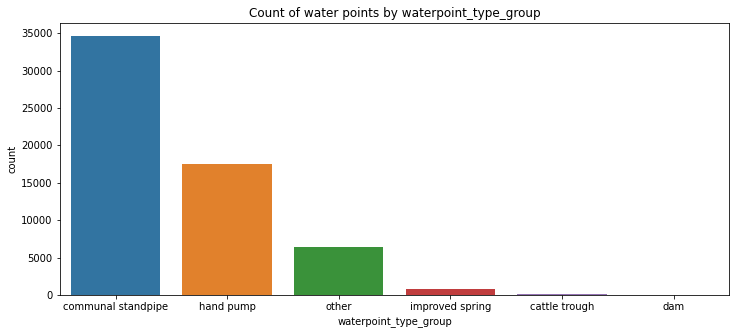

In [2332]:
plt.figure(figsize=(12,5))
sns.countplot(x='waterpoint_type_group',data=train)
plt.title("Count of water points by waterpoint_type_group")

Text(0.5, 1.0, 'Count of water points by management')

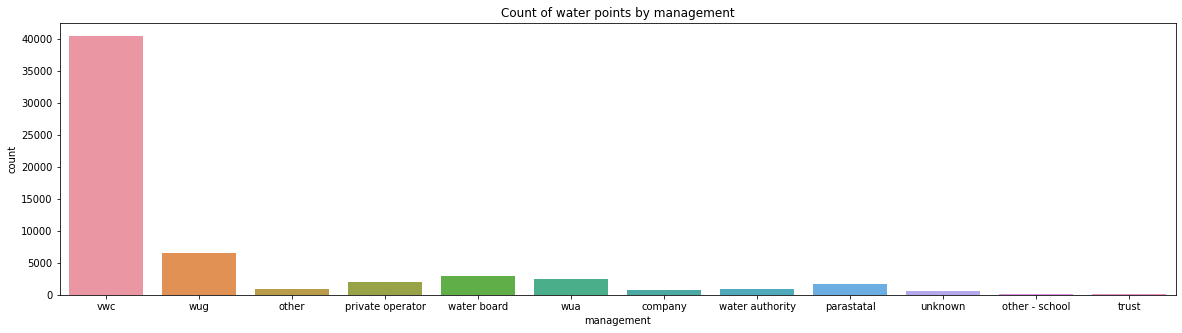

In [2333]:
plt.figure(figsize=(20,5))
sns.countplot(x='management',data=train)
plt.title("Count of water points by management")

Text(0.5, 1.0, 'Count of water points by management_group')

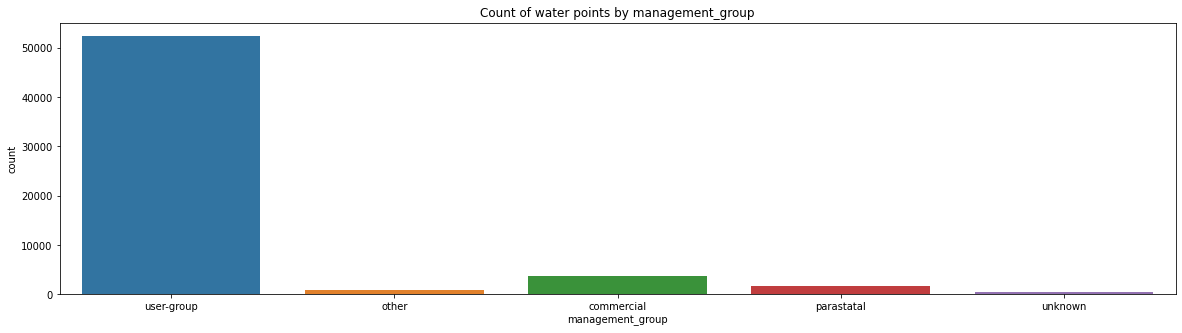

In [2334]:
plt.figure(figsize=(20,5))
sns.countplot(x='management_group',data=train)
plt.title("Count of water points by management_group")

In [2335]:
train["funder"].nunique()

1897

In [2336]:
train["installer"].nunique()

2145

In [2337]:
train["basin"].nunique()

9

In [2338]:
train["region_code"].nunique()

27

In [2339]:
train["district_code"].nunique()

20

In [2340]:
train["lga"].nunique()

125

In [2341]:
train["ward"].nunique()

2092

In [2342]:
train["construction_year"].nunique()

55

In [2343]:
train["amount_tsh"].max()

350000.0

In [2344]:
train["gps_height"].max()

2770

In [2345]:
train["amount_tsh"].min()

0.0

In [2346]:
train["gps_height"].min()

-90

In [2347]:
train["region_code"].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [2348]:
train["construction_year"].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [2349]:
train["region_code"].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [2350]:
train["district_code"].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [2351]:
# train.loc[(train["quality_group"]!='good'), 'quality_group'] = "bad"
# train.loc[((train["extraction_type_class"]=='rope pump') | (train["extraction_type_class"]=='wind-powered')), 'extraction_type_class'] = "other"
# train.loc[((train["waterpoint_type_group"]!='hand pump') & (train["waterpoint_type_group"]!='communal standpipe') & (train["waterpoint_type_group"]!='other')), 'waterpoint_type_group'] = "other"

In [2352]:
featuresToDrop = ['scheme_name' ,'district_code','lga','ward','date_recorded','region','subvillage','public_meeting','extraction_type','extraction_type_class','recorded_by','quality_group','wpt_name','num_private','payment','quantity','waterpoint_type_group','management_group','source_class','source_type']
train.drop(featuresToDrop, axis=1, inplace=True)
train.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region_code,population,scheme_management,permit,construction_year,extraction_type_group,management,payment_type,water_quality,quantity_group,source,waterpoint_type
id,,,,,,,,,,,,,,,,,,,
69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,11,109,VWC,False,1999,gravity,vwc,annually,soft,enough,spring,communal standpipe
8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,20,280,Other,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe
34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,21,250,VWC,True,2009,gravity,vwc,per bucket,soft,enough,dam,communal standpipe multiple
67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,90,58,VWC,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple
19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,18,0,NaN,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe


In [2353]:
test.drop(featuresToDrop, axis=1, inplace=True)

In [2354]:
train.isnull().sum()

amount_tsh                  0
funder                   3635
gps_height                  0
installer                3655
longitude                   0
latitude                    0
basin                       0
region_code                 0
population                  0
scheme_management        3877
permit                   3056
construction_year           0
extraction_type_group       0
management                  0
payment_type                0
water_quality               0
quantity_group              0
source                      0
waterpoint_type             0
dtype: int64

In [2355]:
test.isnull().sum()

amount_tsh                 0
funder                   869
gps_height                 0
installer                877
longitude                  0
latitude                   0
basin                      0
region_code                0
population                 0
scheme_management        969
permit                   737
construction_year          0
extraction_type_group      0
management                 0
payment_type               0
water_quality              0
quantity_group             0
source                     0
waterpoint_type            0
dtype: int64

In [2356]:
train["permit"].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [2357]:
train["scheme_management"].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [2358]:
funderValCounts=train["funder"].value_counts()
print (funderValCounts)

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Abs                          1
Kibara Foundation            1
Misana George                1
Dom                          1
Revocatus Mahatane           1
Name: funder, Length: 1897, dtype: int64


In [2359]:
train = train.fillna(value='Unknown')

In [2360]:
allowedFunders= funderValCounts[funderValCounts > 1000].keys()

In [2361]:
installerValCounts=train["installer"].value_counts()
print (installerValCounts)

DWE              17402
Unknown           3658
Government        1825
RWE               1206
Commu             1060
                 ...  
Winkyens             1
O                    1
TLC/community        1
WDECO                1
WASHIMA              1
Name: installer, Length: 2145, dtype: int64


In [2362]:
allowedInstallers= installerValCounts[installerValCounts > 500].keys()

In [2363]:
schemeMngmntValCounts=train["scheme_management"].value_counts()

In [2364]:
allowedSchemeMngmnt= schemeMngmntValCounts[schemeMngmntValCounts > 500].keys()

In [2365]:
train.loc[~train["funder"].isin(allowedFunders), "funder"] = "Other"
train["funder"].value_counts()[0:50]

Other                     38687
Government Of Tanzania     9084
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
Kkkt                       1287
World Vision               1246
Unicef                     1057
Name: funder, dtype: int64

In [2366]:
train.loc[~train["scheme_management"].isin(allowedSchemeMngmnt), "scheme_management"] = "Other"
train["scheme_management"].value_counts()[0:50]

VWC                 36793
WUG                  5206
Unknown              3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 936
Name: scheme_management, dtype: int64

In [2367]:
train.loc[~train["installer"].isin(allowedInstallers), "installer"] = "Other"
train["installer"].value_counts()[0:50]

Other                 26550
DWE                   17402
Unknown                3658
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
CES                     610
Community               553
DANID                   552
District Council        551
HESAWA                  539
Name: installer, dtype: int64

In [2368]:
test = test.fillna(value='Unknown')
test.loc[~test["funder"].isin(allowedFunders), "funder"] = "Other"
test.loc[~test["installer"].isin(allowedInstallers), "installer"] = "Other"
test.loc[~test["scheme_management"].isin(allowedSchemeMngmnt), "scheme_management"] = "Other"

In [2369]:
train.isnull().sum()

amount_tsh               0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
region_code              0
population               0
scheme_management        0
permit                   0
construction_year        0
extraction_type_group    0
management               0
payment_type             0
water_quality            0
quantity_group           0
source                   0
waterpoint_type          0
dtype: int64

In [2370]:
test.isnull().sum()

amount_tsh               0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
region_code              0
population               0
scheme_management        0
permit                   0
construction_year        0
extraction_type_group    0
management               0
payment_type             0
water_quality            0
quantity_group           0
source                   0
waterpoint_type          0
dtype: int64

In [2371]:
X = train.copy()
Y = lables.copy()
y = Y["status_group"]

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

discrete_features

amount_tsh               False
funder                    True
gps_height                True
installer                 True
longitude                False
latitude                 False
basin                     True
region_code               True
population                True
scheme_management         True
permit                    True
construction_year         True
extraction_type_group     True
management                True
payment_type              True
water_quality             True
quantity_group            True
source                    True
waterpoint_type           True
dtype: bool

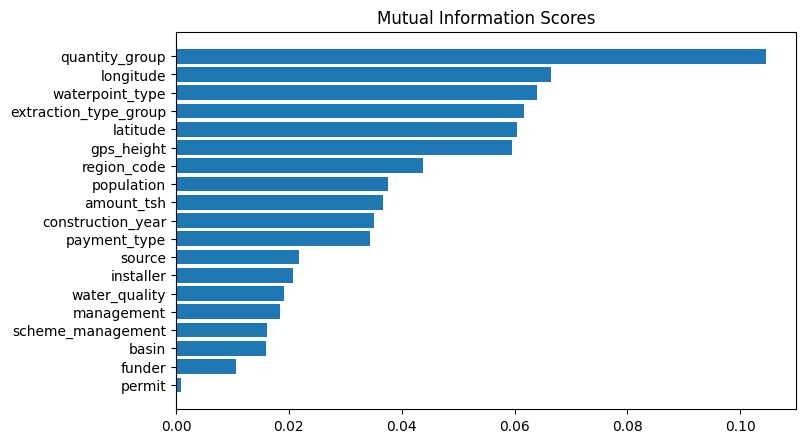

In [2372]:
from sklearn.feature_selection import mutual_info_classif
def make_mi_scores(X, y, discrete_features):
  mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
  mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
  mi_scores = mi_scores.sort_values(ascending=False)
  return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

def plot_mi_scores(scores):
  scores = scores.sort_values(ascending=True)
  width = np.arange(len(scores))
  ticks = list(scores.index)
  plt.barh(width, scores)
  plt.yticks(width, ticks)
  plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [2373]:
y_train = lables["status_group"]

In [2374]:
# label encoded dataframe
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for colname in X_train_label_encoded.select_dtypes("object"):
  trained_le = le.fit(X_train_label_encoded[colname])
  X_train_label_encoded[colname] = trained_le.transform(X_train_label_encoded[colname])
  X_test_label_encoded[colname] = trained_le.transform(X_test_label_encoded[colname])


In [2375]:
# onehot encoded dataframe

categorical_features = ['region_code', 'construction_year','funder', 'installer', 'basin', 'scheme_management', 'permit', 'extraction_type_group', 'management', 'payment_type', 'water_quality', 'quantity_group', 'source', 'waterpoint_type']
cont_features = ['population', 'amount_tsh', 'gps_height']

X_train_onehot_encoded = pd.get_dummies(train[categorical_features])
X_train_onehot_encoded[cont_features] = train[cont_features]

X_test_onehot_encoded = pd.get_dummies(test[categorical_features])
X_test_onehot_encoded[cont_features] = test[cont_features]

# X_train_onehot_encoded.columns = X_train_onehot_encoded.columns.str.replace('[#,<>,&]', ' ')
# X_test_onehot_encoded.columns = X_test_onehot_encoded.columns.str.replace('[#,<>,&]', ' ')

In [2390]:
X_train_onehot_encoded.shape

(59400, 115)

In [2391]:
X_test_onehot_encoded.shape

(14850, 115)

In [2376]:
# duplicated_columns_list = []
# list_of_all_columns = list(X_test_onehot_encoded.columns)
# for column in list_of_all_columns:
#     if list_of_all_columns.count(column) > 1 and not column in duplicated_columns_list:
#         duplicated_columns_list.append(column)
# duplicated_columns_list

In [2377]:
# label encoded l2 normalized dataframe

from sklearn.preprocessing import Normalizer
cols_to_norm = ['population', 'amount_tsh', 'gps_height']
X_train_label_encoded_norm = X_train_label_encoded.copy()
X_test_label_encoded_norm = X_test_label_encoded.copy()
X_train_label_encoded_norm[cols_to_norm] = Normalizer().fit_transform(X_train_label_encoded_norm[cols_to_norm])
X_test_label_encoded_norm[cols_to_norm] = Normalizer().fit_transform(X_test_label_encoded_norm[cols_to_norm])

In [2378]:
# onehot encoded l2 normalized dataframe

X_train_onehot_encoded_norm = X_train_onehot_encoded.copy()
X_test_onehot_encoded_norm = X_test_onehot_encoded.copy()
X_train_onehot_encoded_norm[cols_to_norm] = Normalizer().fit_transform(X_train_onehot_encoded_norm[cols_to_norm])
X_test_onehot_encoded_norm[cols_to_norm] = Normalizer().fit_transform(X_test_onehot_encoded_norm[cols_to_norm])

In [2379]:
# X_train,X_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.2)

In [2380]:
from sklearn.svm import SVC
svcModel = SVC(C=50,kernel='rbf',gamma=1)     

In [2381]:
from sklearn.ensemble import RandomForestClassifier
rfModel = RandomForestClassifier(n_estimators=100)

In [2382]:
from xgboost import XGBClassifier
xgBoostmodel = XGBClassifier()

In [2383]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfModel, X_train_onehot_encoded, y_train, cv=5)
print(scores)

[0.79107744 0.78501684 0.79267677 0.79040404 0.78737374]


In [2384]:
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

0.789 accuracy with a standard deviation of 0.003


In [2385]:
rfModel.fit(X_train_onehot_encoded, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [2386]:
y_pred = rfModel.predict(X_test_onehot_encoded)

In [2387]:
submission = pd.read_csv(path+"/SubmissionFormat.csv", 
                            index_col="id")
submission["status_group"] = y_pred
submission.head()

from google.colab import files
submission.to_csv('my_submission_pumpitup0917.csv', index=True) 
files.download('my_submission_pumpitup0917.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>